In [1]:
import numpy as np

def rigid_transform_3D(A, B):
    """
    Find the optimal rotation and translation that aligns points A to points B.
    
    A: Nx3 numpy array of points in the first coordinate system.
    B: Nx3 numpy array of points in the second coordinate system.
    
    Returns: 
    R: Rotation matrix (3x3)
    t: Translation vector (3x1)
    """

    assert A.shape == B.shape

    # Step 1: Compute the centroids of both sets
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)

    # Step 2: Center the points
    AA = A - centroid_A
    BB = B - centroid_B

    # Step 3: Compute the covariance matrix
    H = np.dot(AA.T, BB)

    # Step 4: Compute the Singular Value Decomposition
    U, S, Vt = np.linalg.svd(H)

    # Step 5: Compute the rotation matrix R
    R = np.dot(Vt.T, U.T)

    # Special reflection case
    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = np.dot(Vt.T, U.T)

    # Step 6: Compute the translation vector t
    t = centroid_B.T - np.dot(R, centroid_A.T)

    return R, t

# Example usage

# Points in the first coordinate system (A)
A = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0],
    [10.0, 11.0, 12.0]
])

# Corresponding points in the second coordinate system (B)
B = np.array([
    [2.0, 4.0, 6.0],
    [8.0, 10.0, 12.0],
    [14.0, 16.0, 18.0],
    [20.0, 22.0, 24.0]
])

# Find the rotation matrix R and translation vector t
R, t = rigid_transform_3D(A, B)

print("Rotation matrix R:")
print(R)

print("\nTranslation vector t:")
print(t)

# To transform B to align with A, apply the transformation: B' = R * B + t
B_transformed = (np.dot(R, B.T)).T + t

print("\nTransformed B points to match A:")
print(B_transformed)


Rotation matrix R:
[[-0.33333333  0.66666667  0.66666667]
 [ 0.66666667 -0.33333333  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]]

Translation vector t:
[3.5 6.5 9.5]

Transformed B points to match A:
[[ 9.5 10.5 11.5]
 [15.5 16.5 17.5]
 [21.5 22.5 23.5]
 [27.5 28.5 29.5]]


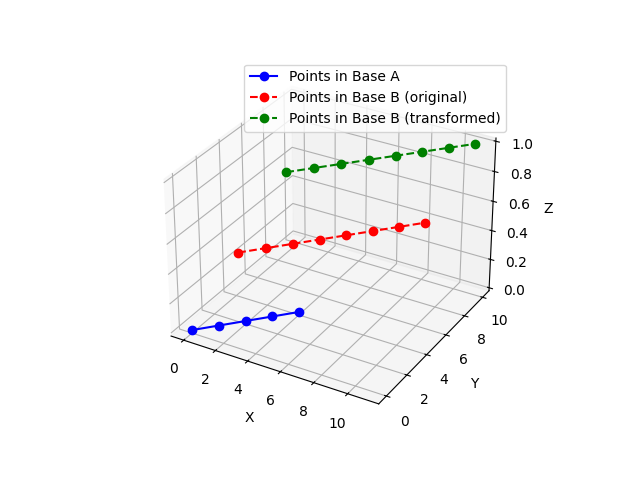

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

def rigid_transform_3D(A, B):
    """
    Find the optimal rotation and translation that aligns points A to points B.
    
    A: Nx3 numpy array of points in the first coordinate system.
    B: Nx3 numpy array of points in the second coordinate system.
    
    Returns: 
    R: Rotation matrix (3x3)
    t: Translation vector (3x1)
    """
    assert A.shape == B.shape

    # Step 1: Compute the centroids of both sets
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)

    # Step 2: Center the points
    AA = A - centroid_A
    BB = B - centroid_B

    # Step 3: Compute the covariance matrix
    H = np.dot(AA.T, BB)

    # Step 4: Compute the Singular Value Decomposition
    U, S, Vt = np.linalg.svd(H)

    # Step 5: Compute the rotation matrix R
    R = np.dot(Vt.T, U.T)

    # Special reflection case
    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = np.dot(Vt.T, U.T)

    # Step 6: Compute the translation vector t
    t = centroid_B.T - np.dot(R, centroid_A.T)

    return R, t

# Create points of a line in base A
line_A = np.array([
    [0, 0, 0],
    [1, 1, 0],
    [2, 2, 0],
    [3, 3, 0],
    [4, 4, 0]
])

# Create corresponding points in base B with some random translation and rotation applied
# These are the common points between base A and base B
common_points_B = np.array([
    [2.0, 1.5, 0.5],
    [3.0, 2.5, 0.5],
    [4.0, 3.5, 0.5],
    [5.0, 4.5, 0.5],
    [6.0, 5.5, 0.5]
])

# Add some extra points that are in base B but not common with base A
additional_points_B = np.array([
    [7.0, 6.5, 0.5],
    [8.0, 7.5, 0.5],
    [9.0, 8.5, 0.5]
])

# Combine the common points and the additional points to form the full set in base B
points_B = np.vstack((common_points_B, additional_points_B))

# Perform rigid transformation to align points in base B with points in base A
R, t = rigid_transform_3D(line_A, common_points_B)

# Apply the transformation to the entire set of points in base B
transformed_B = np.dot(points_B, R.T) + t

# Plot the original and transformed points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot line_A (points in base A)
ax.plot(line_A[:, 0], line_A[:, 1], line_A[:, 2], 'bo-', label="Points in Base A")

# Plot points_B (points in base B before transformation)
ax.plot(points_B[:, 0], points_B[:, 1], points_B[:, 2], 'ro--', label="Points in Base B (original)")

# Plot transformed_B (points in base B after transformation to align with base A)
ax.plot(transformed_B[:, 0], transformed_B[:, 1], transformed_B[:, 2], 'go--', label="Points in Base B (transformed)")

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show plot
plt.show()


In [3]:
transformed_B

array([[ 4.,  3.,  1.],
       [ 5.,  4.,  1.],
       [ 6.,  5.,  1.],
       [ 7.,  6.,  1.],
       [ 8.,  7.,  1.],
       [ 9.,  8.,  1.],
       [10.,  9.,  1.],
       [11., 10.,  1.]])

In [4]:
line_A

array([[0, 0, 0],
       [1, 1, 0],
       [2, 2, 0],
       [3, 3, 0],
       [4, 4, 0]])

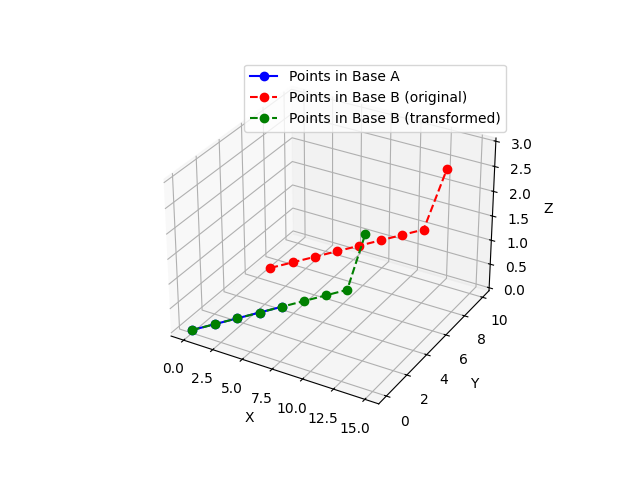

Line A:
 [[0 0 0]
 [1 1 0]
 [2 2 0]
 [3 3 0]
 [4 4 0]]

Transformed points from B:
 [[8.8817842e-16 4.4408921e-16 0.0000000e+00]
 [1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [2.0000000e+00 2.0000000e+00 0.0000000e+00]
 [3.0000000e+00 3.0000000e+00 0.0000000e+00]
 [4.0000000e+00 4.0000000e+00 0.0000000e+00]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def rigid_transform_3D(A, B):
    """
    Find the optimal rotation and translation that aligns points A to points B.
    
    A: Nx3 numpy array of points in the first coordinate system.
    B: Nx3 numpy array of points in the second coordinate system.
    
    Returns: 
    R: Rotation matrix (3x3)
    t: Translation vector (3x1)
    """
    assert A.shape == B.shape

    # Step 1: Compute the centroids of both sets
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)

    # Step 2: Center the points
    AA = A - centroid_A
    BB = B - centroid_B

    # Step 3: Compute the covariance matrix
    H = np.dot(AA.T, BB)

    # Step 4: Compute the Singular Value Decomposition
    U, S, Vt = np.linalg.svd(H)

    # Step 5: Compute the rotation matrix R
    R = np.dot(Vt.T, U.T)

    # Special reflection case
    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = np.dot(Vt.T, U.T)

    # Step 6: Compute the translation vector t
    t = centroid_A.T - np.dot(R, centroid_B.T)

    return R, t

# Create points of a line in base A
line_A = np.array([
    [0, 0, 0],
    [1, 1, 0],
    [2, 2, 0],
    [3, 3, 0],
    [4, 4, 0]
])

# Create corresponding points in base B with some random translation and rotation applied
# These are the common points between base A and base B
common_points_B = np.array([
    [4.0, 3.0, 1.0],
    [5.0, 4.0, 1.0],
    [6.0, 5.0, 1.0],
    [7.0, 6.0, 1.0],
    [8.0, 7.0, 1.0]
])

# Add some extra points that are in base B but not common with base A
additional_points_B = np.array([
    [9.0, 8.0, 1.0],
    [10.0, 9.0, 1.0],
    [11.0, 10.0, 1.0],
    [15.0,7.0,3.0]
])

# Combine the common points and the additional points to form the full set in base B
points_B = np.vstack((common_points_B, additional_points_B))

# Perform rigid transformation to align points in base B with points in base A
R, t = rigid_transform_3D(line_A, common_points_B)

# Apply the transformation to the entire set of points in base B
transformed_B = np.dot(points_B, R.T) + t

# Plot the original and transformed points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot line_A (points in base A)
ax.plot(line_A[:, 0], line_A[:, 1], line_A[:, 2], 'bo-', label="Points in Base A")

# Plot points_B (points in base B before transformation)
ax.plot(points_B[:, 0], points_B[:, 1], points_B[:, 2], 'ro--', label="Points in Base B (original)")

# Plot transformed_B (points in base B after transformation to align with base A)
ax.plot(transformed_B[:, 0], transformed_B[:, 1], transformed_B[:, 2], 'go--', label="Points in Base B (transformed)")

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show plot
plt.show()

# Check the transformation result (the first 5 points should match line_A)
print("Line A:\n", line_A)
print("\nTransformed points from B:\n", transformed_B[:5])
